In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('dataset.xlsx')
df.tail()


<bound method NDFrame.tail of       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            33.8          11.1         4.18        4.6          150  26.6   
1            44.6          14.0         6.86        6.3          232  20.4   
2            42.9          14.0         4.57        6.2          336  30.6   
3            41.9          14.4         4.67        3.5          276  30.8   
4            40.6          13.3         4.85       14.9          711  27.4   
...           ...           ...          ...        ...          ...   ...   
3304         39.0          13.2         4.45        4.0           50  29.7   
3305         25.4           8.2         3.27        5.4           90  25.1   
3306         38.2          12.4         4.40        8.4          328  28.2   
3307         43.4          15.2         5.29       10.1          326  28.7   
3308         32.4          10.7         3.66        9.4          214  29.2   

      MCHC   MCV  AGE SEX  SOURCE

In [5]:
df.shape

(3309, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [9]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398308
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489623
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


In [11]:
df.isnull().sum()


HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [13]:
df.nunique()

HAEMATOCRIT     314
HAEMOGLOBINS    128
ERYTHROCYTE     406
LEUCOCYTE       255
THROMBOCYTE     525
MCH             177
MCHC            101
MCV             390
AGE              95
SEX               2
SOURCE            2
dtype: int64

In [15]:
df = df.dropna()


In [17]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
l1.fit(df['SEX'])
df.SEX = l1.transform(df.SEX)
print(df)

      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            33.8          11.1         4.18        4.6          150  26.6   
1            44.6          14.0         6.86        6.3          232  20.4   
2            42.9          14.0         4.57        6.2          336  30.6   
3            41.9          14.4         4.67        3.5          276  30.8   
4            40.6          13.3         4.85       14.9          711  27.4   
...           ...           ...          ...        ...          ...   ...   
3304         39.0          13.2         4.45        4.0           50  29.7   
3305         25.4           8.2         3.27        5.4           90  25.1   
3306         38.2          12.4         4.40        8.4          328  28.2   
3307         43.4          15.2         5.29       10.1          326  28.7   
3308         32.4          10.7         3.66        9.4          214  29.2   

      MCHC   MCV  AGE  SEX  SOURCE  
0     32.8  80.9   33    0

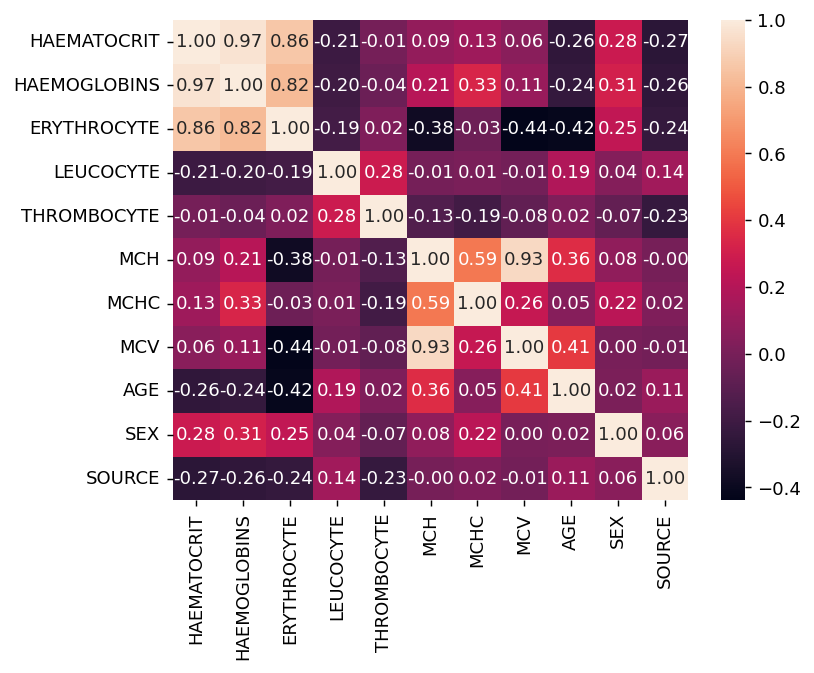

In [19]:
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

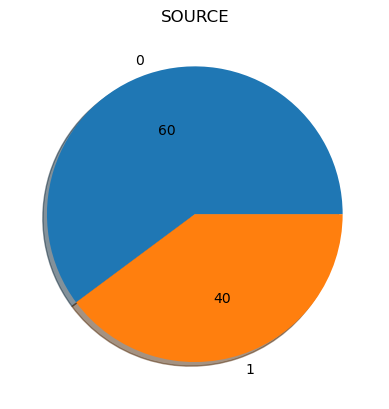

In [21]:
plt.pie(df.SOURCE.value_counts(), 
        labels= ['0', '1'], 
        autopct='%.f', shadow=True)
plt.title('SOURCE')
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)

<Axes: ylabel='HAEMATOCRIT'>

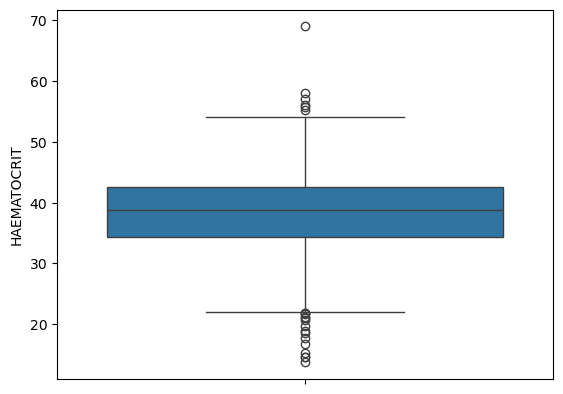

In [27]:
# check outlier in column
sns.boxplot(df['HAEMATOCRIT'])


<Axes: ylabel='HAEMOGLOBINS'>

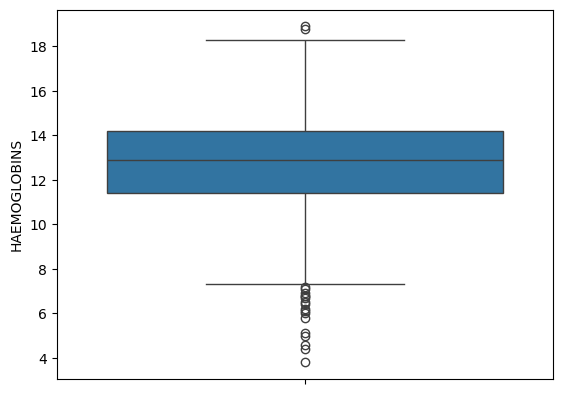

In [29]:
sns.boxplot(df['HAEMOGLOBINS'])

<Axes: ylabel='ERYTHROCYTE'>

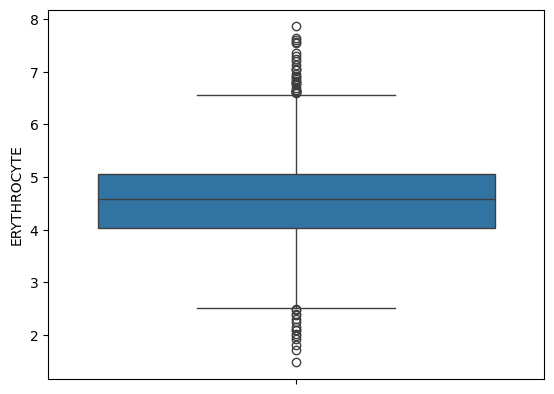

In [45]:
sns.boxplot(df['ERYTHROCYTE'])

<Axes: ylabel='LEUCOCYTE'>

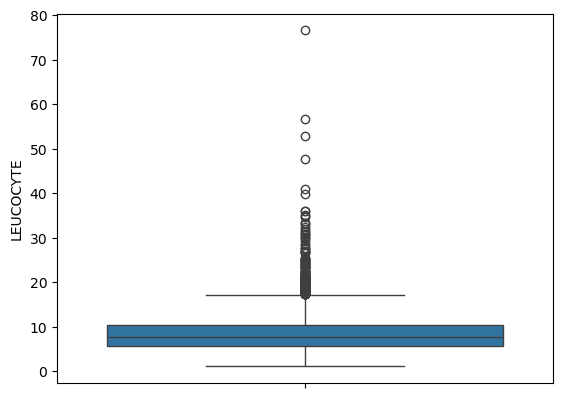

In [47]:
sns.boxplot(df['LEUCOCYTE'])

<Axes: ylabel='THROMBOCYTE'>

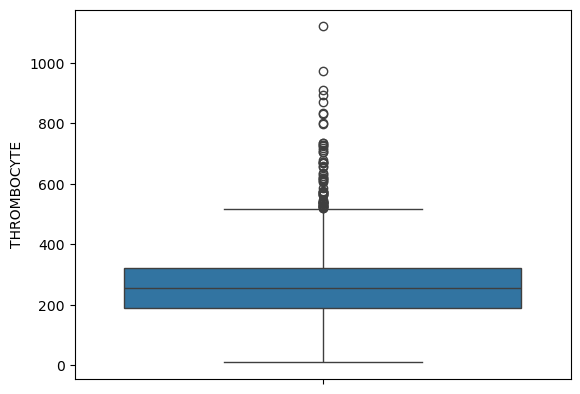

In [49]:
sns.boxplot(df['THROMBOCYTE'])

<Axes: ylabel='MCH'>

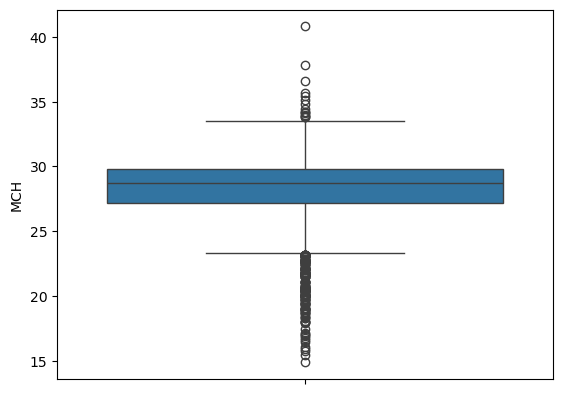

In [51]:
sns.boxplot(df['MCH'])

<Axes: ylabel='MCHC'>

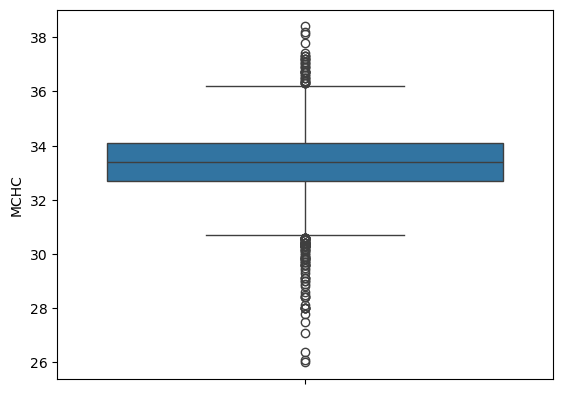

In [53]:
sns.boxplot(df['MCHC'])

<Axes: ylabel='MCV'>

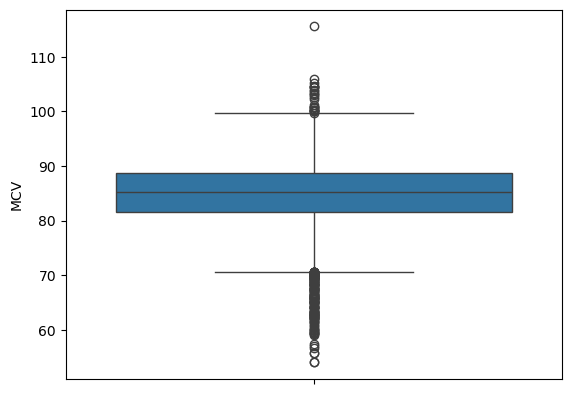

In [55]:
sns.boxplot(df['MCV'])

<Axes: ylabel='AGE'>

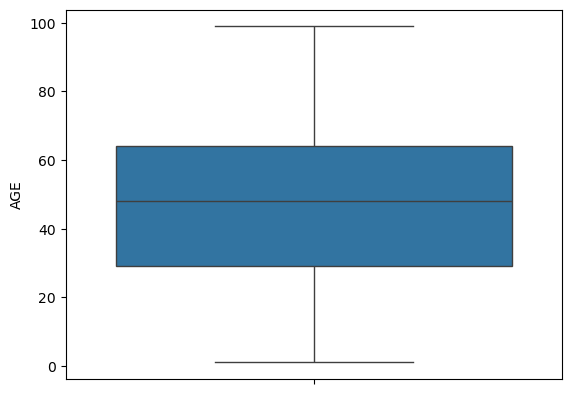

In [57]:
sns.boxplot(df['AGE'])

In [59]:
x = df.iloc[:, :10]
y = df.iloc[:, -1]	

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)


lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")


Training Score: 0.7223661485319517
Test Score: 0.7150050352467271


In [39]:
from sklearn.ensemble import RandomForestRegressor

modelr = RandomForestRegressor()
modelr.fit(x, y)
predictionsr = modelr.predict(x_test)
accr = modelr.score(x_train,y_train)
rf_acc = accr*100


In [41]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(x, y)
dtacc=round(model.score(x, y), 4)

In [ ]:
y_test_predictions = lg_model.predict(x_test)

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Accuracy = {accuracy}")

In [ ]:
precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)
f1score = f1_score(y_test, y_test_predictions)
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
clf = GridSearchCV(estimator = lg_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

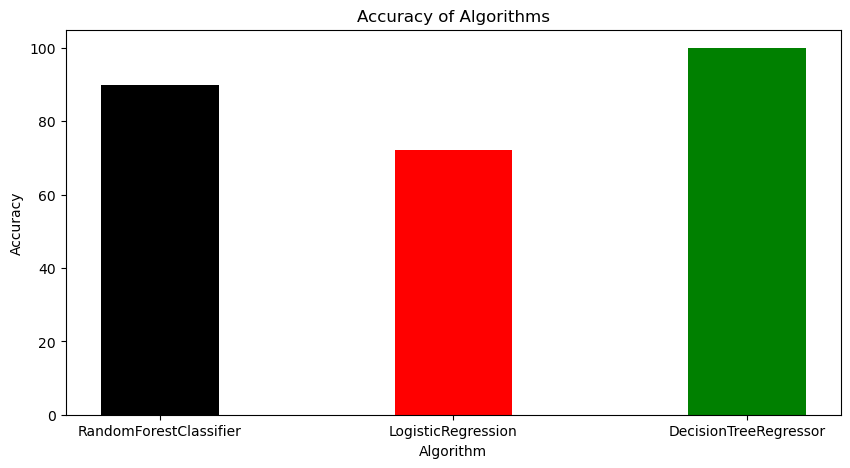

In [43]:
data = {'RandomForestClassifier':rf_acc,'LogisticRegression':lg_train*100,'DecisionTreeRegressor':dtacc*100}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color =['black', 'red', 'green'], 
        width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Algorithms")
plt.show()